<a href="https://colab.research.google.com/github/ruoroj/Catsn-Dogs/blob/main/CandD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question

### Understanding the Context

The database is composed of several hundred images of cats and Dogs. Using these images we will train a amchine learning model to predict the difference between cats and dogs. 

### Specifying the Question

The database has picture of cats and dogs that should be used to cllasify a picture as either a dog or cat. 

### Metrics for Success

The metric of success for this project is the model accuracy. The model accuracy shows how well a particular model predicts the dependent variable when tested after training it. The accuracy will be derived using the accuracy score. An accuracy that is low shows our model fails to accurately predict the dependent variable and the data may be underfit while an accuracy of 1 is not good either since the model is overfitted. In this project, my aim is to achieve an accuracy of at least 80%.

### The Experimental Design

The experimental design for this project is as follows:

- Loading the libraries and dataset
- Data cleaning and preparation
- Making predictions using the different models that I've created
- Assesing the accuracy of the models created
- Making conclusions and challenging the solution

# 2. Reading the Data

In [21]:
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.regression.quantile_regression as quant
import scipy as sp
import tensorflow as tf
import warnings
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [22]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [36]:
from zipfile import ZipFile as zf
test_zip = zf('/content/drive/MyDrive/tempdf_storage/cand/test1.zip', 'r')
test_zip.extractall()
test_zip.close()
img_files = os.listdir('/content/drive/MyDrive/tempdf_storage/cand/CandD')
testfiles = os.listdir('/content/test1')

In [ ]:

train = pd.DataFrame(x,columns = ['filename'])
testfiles

In [38]:
train['label'] = train['filename'].str.split('.',1,expand = True)[0]
train.head()
test = pd.DataFrame(os.listdir('/content/test1'),columns = ['filename'])
test.head()

,filename
0,9267.jpg
1,6266.jpg
2,11357.jpg
3,10113.jpg
4,10297.jpg


# Data cleaning.

### Train files

In [43]:
# Checking whether data is balanced or not (Vissually)
train.label.value_counts()

dog    12510
cat    12500
Name: label, dtype: int64

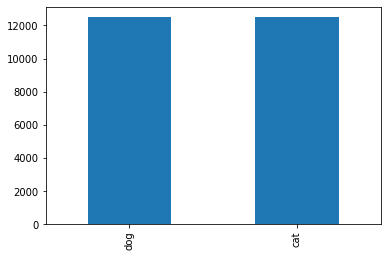

In [40]:
# Checking whether data is balanced or not (Vissually)
train['label'].value_counts().plot.bar()

In [41]:
# check for Duplicated values. 
train.duplicated().sum()

0